<a href="https://colab.research.google.com/github/Juliogallinaro/Google_colab/blob/master/Melanoma_detection_Fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag

platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/{accelerator}/torch_nightly.html
!pip install fastai

import torch

print(torch.__version__)
print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

Looking in links: https://download.pytorch.org/whl/nightly/cu100/torch_nightly.html
    100% |████████████████████████████████| 704.7MB 25kB/s 
  Stored in directory: /root/.cache/pip/wheels/48/5d/04/22361a593e70d23b1f7746d932802efe1f0e523376a74f321e
Successfully built wrapt
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
  Found existing installation: wrapt 1.11.1
    Uninstalling wrapt-1.11.1:
      Successfully uninstalled wrapt-1.11.1
1.0.0.dev20190221
True
True


In [3]:
import fastai
print(fastai.__version__)
from fastai import *
from fastai.vision import *

1.0.45


In [4]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131352 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
# Mount your google drive to access files from it 
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
# The image folder that I am using for this tutorial is located in my google drive under 'app' folder
# So we need to change directory to the 'app' folder

import os
os.chdir("drive/app")

In [7]:
!ls

drive  Melanoma


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = 'Melanoma'

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(),num_workers=0, size=224).normalize(imagenet_stats)

In [11]:
print('Train size:', len(data.train_ds))
print('Valid size:', len(data.valid_ds))

Train size: 400
Valid size: 120


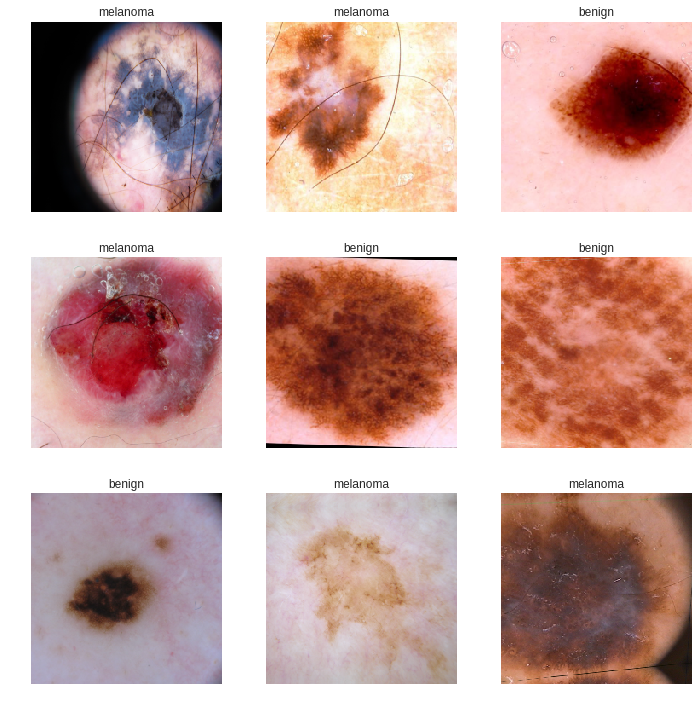

In [12]:
data.show_batch(rows=3, figsize=(10,10))

In [13]:
%%time
learn = create_cnn(data, models.resnet50, metrics=accuracy)
learn.fit(1)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 82175977.81it/s]


epoch,train_loss,valid_loss,accuracy
1,0.986403,0.720799,0.733333


CPU times: user 1min, sys: 12.7 s, total: 1min 13s
Wall time: 5min 3s


In [14]:
%%timeit
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-5,3e-4), pct_start=0.05)

epoch,train_loss,valid_loss,accuracy
1,0.576348,0.695486,0.741667
2,0.466554,0.645907,0.766667
3,0.404849,0.718090,0.725000


epoch,train_loss,valid_loss,accuracy
1,0.292428,0.755459,0.741667
2,0.255470,0.732656,0.725000
3,0.237877,0.750618,0.733333


epoch,train_loss,valid_loss,accuracy
1,0.206068,0.872739,0.683333
2,0.162554,0.906117,0.725000
3,0.148621,0.973520,0.691667


epoch,train_loss,valid_loss,accuracy
1,0.109785,0.944876,0.725000
2,0.111240,1.251541,0.625000
3,0.100727,1.131475,0.666667


1 loop, best of 3: 3min 7s per loop


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

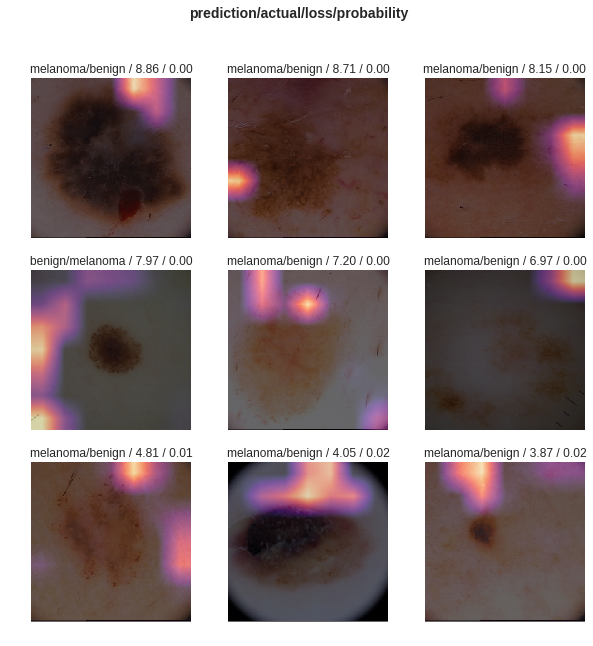

In [16]:
interp.plot_top_losses(9, figsize=(10,10))

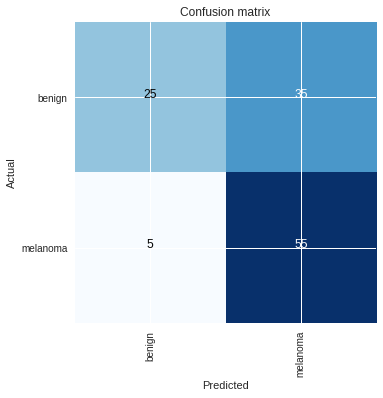

In [17]:
interp.plot_confusion_matrix()